# Data - Creating, Obtaining, and Using Data Sets
Week Two - August 1, 2022

Additional Data Sets are available at:
* [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php)
* [Kaggle Data Sets](https://www.kaggle.com/datasets)
* [KDNuggets](https://www.kdnuggets.com/datasets/index.html)
* [KDD Data Sets](https://github.com/topics/kdd-dataset)


## Chapter 9 - Getting Data


In [36]:
import sys                          # System interaction
import os                           # 
import webbrowser                   #
import csv                          # Comma Seperated Value
import re                           # Regular Expressions
import random                       #
import math                         #
from typing import List, Dict       #
from collections import Counter     #

# Setting up to use the author's library, cloned into the 'scratch' folder here (MIT License retained)
sys.path.insert(0,os.path.abspath('.'))

from scratch.statistics import correlation
from scratch.linear_algebra import Matrix, Vector, make_matrix

# ... and a few other external libraries to use... (again, use pip if on your local system)
!conda install --yes --prefix {sys.prefix} matplotlib
!conda install --yes --prefix {sys.prefix} tqdm
!conda install --yes --prefix {sys.prefix} bs4
!conda install --yes --prefix {sys.prefix} twython

import matplotlib.pyplot as plt


/bin/bash: conda: command not found
/bin/bash: conda: command not found
/bin/bash: conda: command not found
/bin/bash: conda: command not found


### Creating a File
We can open a file descriptor **f** in write mode ('w'), then write one string at a time via the <code>f.write(...)</code> function.

The **\n** at the end of each write in this example create a *newline* char so each email address will appear on a new line in the file.

We can then use <code>os.path</code> functions to verify that the file was created.

In [11]:
# Just stick some data there
with open('email_addresses.txt', 'w') as f:
    f.write("joelgrus@gmail.com\n")
    f.write("joel@m.datasciencester.com\n")
    f.write("joelgrus@m.datasciencester.com\n")

print("File Size:          %s" % os.path.getsize('email_addresses.txt'))
print("File modified time: %s" % os.path.getmtime('email_addresses.txt'))
print("File Stat from OS:")
print(os.stat('email_addresses.txt'))

File Size:          77
File modified time: 1659327265.2986894
File Stat from OS:
os.stat_result(st_mode=33204, st_ino=5508316, st_dev=2067, st_nlink=1, st_uid=1000, st_gid=1001, st_size=77, st_atime=1659326698, st_mtime=1659327265, st_ctime=1659327265)


In [12]:
# Create a simple email string parser to break out the *mailbox* from the *domain*
def get_domain(email_address: str) -> str:
    """Split on '@' and return the last piece"""
    return email_address.lower().split("@")[-1]

# a couple of tests
assert get_domain('joelgrus@gmail.com') == 'gmail.com'
assert get_domain('joel@m.datasciencester.com') == 'm.datasciencester.com'


In [13]:
from collections import Counter

with open('email_addresses.txt', 'r') as f:
    domain_counts = Counter(get_domain(line.strip())
                            for line in f
                            if "@" in line)


print("Domain Counts: %s" % domain_counts)

Domain Counts: Counter({'m.datasciencester.com': 2, 'gmail.com': 1})


In [18]:
with open('tab_delimited_stock_prices.txt', 'w') as f:
    f.write("""6/20/2014\tAAPL\t90.91
6/20/2014\tMSFT\t41.68
6/20/2014\tFB\t64.5
6/19/2014\tAAPL\t91.86
6/19/2014\tMSFT\t41.51
6/19/2014\tFB\t64.34
""")

with open('colon_delimited_stock_prices.txt', 'w') as f:
    f.write("""date:symbol:closing_price
6/20/2014:AAPL:90.91
6/20/2014:MSFT:41.68
6/20/2014:FB:64.5
""")
    
todays_prices = {'AAPL': 90.91, 'MSFT': 41.68, 'FB': 64.5 }

with open('comma_delimited_stock_prices.txt', 'w') as f:
    csv_writer = csv.writer(f, delimiter=',')
    for stock, price in todays_prices.items():
        csv_writer.writerow([stock, price])

def process(date: str, symbol: str, closing_price: float) -> None:
    # Imaginge that this function actually does something.
    print("Results: %s" % [date,symbol,closing_price])
    assert closing_price > 0.0

In [21]:
import csv

print("Processing Tab File:\n")
with open('tab_delimited_stock_prices.txt') as f:
    tab_reader = csv.reader(f, delimiter='\t')
    for row in tab_reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        process(date, symbol, closing_price)


print("\n\nProcessing Colon File:\n")
with open('colon_delimited_stock_prices.txt') as f:
    colon_reader = csv.DictReader(f, delimiter=':')
    for dict_row in colon_reader:
        date = dict_row["date"]
        symbol = dict_row["symbol"]
        closing_price = float(dict_row["closing_price"])
        process(date, symbol, closing_price)
        


Processing Tab File:

Results: ['6/20/2014', 'AAPL', 90.91]
Results: ['6/20/2014', 'MSFT', 41.68]
Results: ['6/20/2014', 'FB', 64.5]
Results: ['6/19/2014', 'AAPL', 91.86]
Results: ['6/19/2014', 'MSFT', 41.51]
Results: ['6/19/2014', 'FB', 64.34]


Processing Colon File:

Results: ['6/20/2014', 'AAPL', 90.91]
Results: ['6/20/2014', 'MSFT', 41.68]
Results: ['6/20/2014', 'FB', 64.5]


### Web Scraping
Grabbing HTML from [BeautifulSoup](https://raw.githubusercontent.com/joelgrus/data/master/getting-data.html)

In [29]:
from bs4 import BeautifulSoup
import requests


url = ("https://raw.githubusercontent.com/joelgrus/data/master/getting-data.html")
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')

first_paragraph = soup.find('p')        # or just soup.p


assert str(soup.find('p')) == '<p id="p1">This is the first paragraph.</p>'

first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()


assert first_paragraph_words == ['This', 'is', 'the', 'first', 'paragraph.']

first_paragraph_id = soup.p['id']       # raises KeyError if no 'id'
first_paragraph_id2 = soup.p.get('id')  # returns None if no 'id'


assert first_paragraph_id == first_paragraph_id2 == 'p1'

all_paragraphs = soup.find_all('p')  # or just soup('p')
paragraphs_with_ids = [p for p in soup('p') if p.get('id')]


assert len(all_paragraphs) == 2
assert len(paragraphs_with_ids) == 1

important_paragraphs = soup('p', {'class' : 'important'})
important_paragraphs2 = soup('p', 'important')
important_paragraphs3 = [p for p in soup('p')
                         if 'important' in p.get('class', [])]


assert important_paragraphs == important_paragraphs2 == important_paragraphs3
assert len(important_paragraphs) == 1

# warning, will return the same span multiple times
# if it sits inside multiple divs
# be more clever if that's the case
spans_inside_divs = [span
                     for div in soup('div')     # for each <div> on the page
                     for span in div('span')]   # find each <span> inside it


assert len(spans_inside_divs) == 3

def paragraph_mentions(text: str, keyword: str) -> bool:
    """
    Returns True if a <p> inside the text mentions {keyword}
    """
    soup = BeautifulSoup(text, 'html5lib')
    paragraphs = [p.get_text() for p in soup('p')]

    return any(keyword.lower() in paragraph.lower()
               for paragraph in paragraphs)

text = """<body><h1>Facebook</h1><p>Twitter</p>"""
assert paragraph_mentions(text, "twitter")       # is inside a <p>
assert not paragraph_mentions(text, "facebook")  # not inside a <p>

print("Important paragraph:  %s" % all_paragraphs)

Important paragraph:  [<p id="p1">This is the first paragraph.</p>, <p class="important">This is the second paragraph.</p>]


### What about JSON format:
JavaScript Object Notation (JSON)

In [23]:
import json
serialized = """{ "title" : "Data Science Book",
                  "author" : "Joel Grus",
                  "publicationYear" : 2019,
                  "topics" : [ "data", "science", "data science"] }"""

# parse the JSON to create a Python dict
deserialized = json.loads(serialized)
assert deserialized["publicationYear"] == 2019
assert "data science" in deserialized["topics"]

print("JSON Content as a dictionary: %s" % deserialized)

JSON Content as a dictionary: {'title': 'Data Science Book', 'author': 'Joel Grus', 'publicationYear': 2019, 'topics': ['data', 'science', 'data science']}


In [35]:
from bs4 import BeautifulSoup
import requests
    
url = "https://www.house.gov/representatives"
text = requests.get(url).text
soup = BeautifulSoup(text, "html5lib")
    
all_urls = [a['href']
                for a in soup('a')
                if a.has_attr('href')]
    
print(len(all_urls))  # 965 for me, way too many
    
import re
# Must start with http:// or https://
# Must end with .house.gov or .house.gov/
regex = r"^https?://.*\.house\.gov/?$"
    
# Let's write some tests!
assert re.match(regex, "http://joel.house.gov")
assert re.match(regex, "https://joel.house.gov")
assert re.match(regex, "http://joel.house.gov/")
assert re.match(regex, "https://joel.house.gov/")
assert not re.match(regex, "joel.house.gov")
assert not re.match(regex, "http://joel.house.com")
assert not re.match(regex, "https://joel.house.gov/biography")
    
# And now apply
good_urls = [url for url in all_urls if re.match(regex, url)]
    
print(len(good_urls))  # still 862 for me
    
    
num_original_good_urls = len(good_urls)
    
good_urls = list(set(good_urls))
    
print(len(good_urls))  # only 431 for me
    
    
assert len(good_urls) < num_original_good_urls
    
html = requests.get('https://jayapal.house.gov').text
soup = BeautifulSoup(html, 'html5lib')
    
# Use a set because the links might appear multiple times.
links = {a['href'] for a in soup('a') if 'press releases' in a.text.lower()}
    
print(links) # {'/media/press-releases'}
    
    
    
# I don't want this file to scrape all 400+ websites every time it runs.
# So I'm going to randomly throw out most of the urls.
# The code in the book doesn't do this.
import random
good_urls = random.sample(good_urls, 5)
print(f"after sampling, left with {good_urls}")
    
from typing import Dict, Set
    
press_releases: Dict[str, Set[str]] = {}
    
for house_url in good_urls:
    html = requests.get(house_url).text
    soup = BeautifulSoup(html, 'html5lib')
    pr_links = {a['href'] for a in soup('a') if 'press releases' in a.text.lower()}
    print(f"{house_url}: {pr_links}")
    press_releases[house_url] = pr_links
    
for house_url, pr_links in press_releases.items():
    for pr_link in pr_links:
        url = f"{house_url}/{pr_link}"
        text = requests.get(url).text
    
        if paragraph_mentions(text, 'data'):
            print(f"{house_url}")
            break  # done with this house_url
    
import requests, json
    
github_user = "joelgrus"
endpoint = f"https://api.github.com/users/{github_user}/repos"
    
repos = json.loads(requests.get(endpoint).text)
    
from collections import Counter
from dateutil.parser import parse
    
dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)
    
last_5_repositories = sorted(repos,
                                 key=lambda r: r["pushed_at"],
                                 reverse=True)[:5]
    
last_5_languages = [repo["language"]
                        for repo in last_5_repositories]
    
import os
    
# Feel free to plug your key and secret in directly
CONSUMER_KEY = os.environ.get("TWITTER_CONSUMER_KEY")
CONSUMER_SECRET = os.environ.get("TWITTER_CONSUMER_SECRET")
    
import webbrowser
from twython import Twython
    
# Get a temporary client to retrieve an authentication url
temp_client = Twython(CONSUMER_KEY, CONSUMER_SECRET)
temp_creds = temp_client.get_authentication_tokens()
url = temp_creds['auth_url']
    
# Now visit that URL to authorize the application and get a PIN
print(f"go visit {url} and get the PIN code and paste it below")
webbrowser.open(url)
PIN_CODE = input("please enter the PIN code: ")
    
# Now we use that PIN_CODE to get the actual tokens
auth_client = Twython(CONSUMER_KEY,
                          CONSUMER_SECRET,
                          temp_creds['oauth_token'],
                          temp_creds['oauth_token_secret'])
final_step = auth_client.get_authorized_tokens(PIN_CODE)
ACCESS_TOKEN = final_step['oauth_token']
ACCESS_TOKEN_SECRET = final_step['oauth_token_secret']

# And get a new Twython instance using them.
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
    
from twython import TwythonStreamer
    
# Appending data to a global variable is pretty poor form
# but it makes the example much simpler
tweets = []
    
class MyStreamer(TwythonStreamer):
    def on_success(self, data):
            """
            What do we do when twitter sends us data?
            Here data will be a Python dict representing a tweet
            """
            # We only want to collect English-language tweets
            if data.get('lang') == 'en':
                tweets.append(data)
                print(f"received tweet #{len(tweets)}")
    
            # Stop when we've collected enough
            if len(tweets) >= 100:
                self.disconnect()
    
    def on_error(self, status_code, data):
            print(status_code, data)
            self.disconnect()
    
stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET,
                        ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
    
# starts consuming public statuses that contain the keyword 'data'
stream.statuses.filter(track='data')
    

967
872
436
{'https://jayapal.house.gov/category/press-releases/', 'https://jayapal.house.gov/category/news/'}
after sampling, left with ['https://sherrill.house.gov/', 'https://velazquez.house.gov', 'https://stauber.house.gov', 'https://lindasanchez.house.gov/', 'https://gohmert.house.gov/']
https://sherrill.house.gov/: {'/media/press-releases'}
https://velazquez.house.gov: {'/media-center/press-releases'}
https://stauber.house.gov: {'/media/press-releases'}
https://lindasanchez.house.gov/: {'/media-center/press-releases'}
https://gohmert.house.gov/: {'/News/DocumentQuery.aspx?DocumentTypeID=1954'}


TwythonError: Twitter API returned a 400 (Bad Request), b'{"errors":[{"code":215,"message":"Bad Authentication data."}]}'

## Chapter 10 - Working With Data

In [37]:
from typing import List, Dict
from collections import Counter
import math

import matplotlib.pyplot as plt

def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)


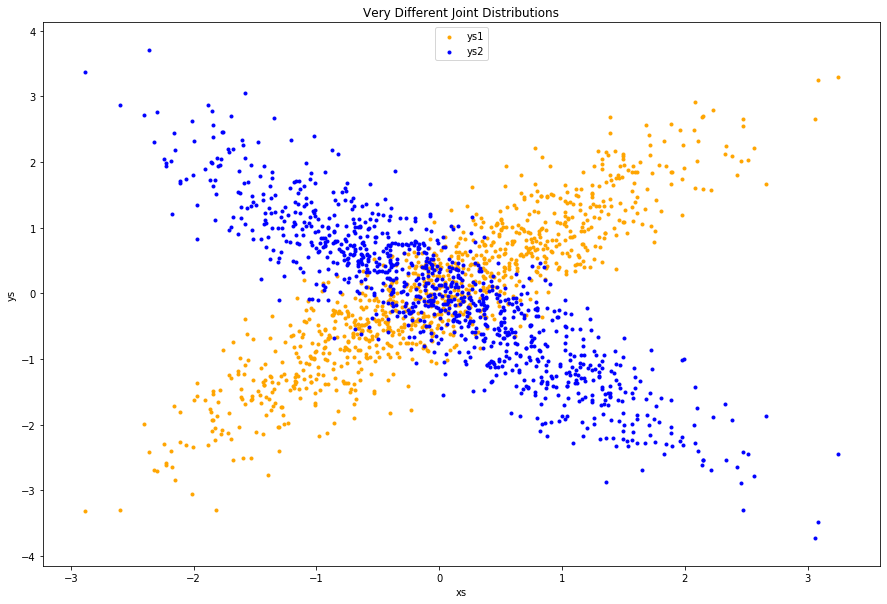

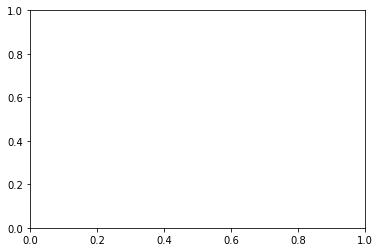

In [39]:

import random
from scratch.probability import inverse_normal_cdf

def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='orange', label='ys1')
plt.scatter(xs, ys2, marker='.', color='blue',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.gcf().set_size_inches(15,10)
plt.title("Very Different Joint Distributions")
plt.show()


plt.savefig('working_scatter.png')
plt.gca().clear()

In [46]:

from scratch.statistics import correlation


assert 0.89 < correlation(xs, ys1) < 0.91
assert -0.91 < correlation(xs, ys2) < -0.89

from scratch.linear_algebra import Matrix, Vector, make_matrix

def correlation_matrix(data: List[Vector]) -> Matrix:
    """
    Returns the len(data) x len(data) matrix whose (i, j)-th entry
    is the correlation between data[i] and data[j]
    """
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])

    return make_matrix(len(data), len(data), correlation_ij)


vectors = [xs, ys1, ys2]
assert correlation_matrix(vectors) == [
    [correlation(xs,  xs), correlation(xs,  ys1), correlation(xs,  ys2)],
    [correlation(ys1, xs), correlation(ys1, ys1), correlation(ys1, ys2)],
    [correlation(ys2, xs), correlation(ys2, ys1), correlation(ys2, ys2)],
]

print("Correlation Matrix: %s" % correlation_matrix(vectors))

Correlation Matrix: [[1.0, 0.8971213958581609, -0.8917225701417892], [0.8971213958581609, 1.0000000000000002, -0.788412431717606], [-0.8917225701417892, -0.788412431717606, 1.0]]


In [47]:

import datetime

stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'}

# oops, typo
stock_price['cosing_price'] = 103.06

prices: Dict[datetime.date, float] = {}

from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

In [48]:

from dateutil.parser import parse

def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol,
                      date=parse(date).date(),
                      closing_price=float(closing_price))

# Now test our function
stock = parse_row(["MSFT", "2018-12-14", "106.03"])

assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03

In [49]:

from typing import Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row

    # Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
        return None

    try:
        date = parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)

# Should return None for errors
assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12--14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12-14", "x"]) is None

# But should return same as before if data is good.
assert try_parse_row(["MSFT", "2018-12-14", "106.03"]) == stock

In [57]:


from dateutil.parser import parse
import csv

with open("data/stocks.csv", "r") as f:
    reader = csv.DictReader(f)
    rows = [[row['Symbol'], row['Date'], row['Close']]
            for row in reader]

# skip header
maybe_data = [try_parse_row(row) for row in rows]

# Make sure they all loaded successfully:
assert maybe_data
assert all(sp is not None for sp in maybe_data)

# This is just to make mypy happy
data = [sp for sp in maybe_data if sp is not None]

max_aapl_price = max(stock_price.closing_price
                     for stock_price in data
                     if stock_price.symbol == "AAPL")

print("Max Apple Price = %s\n\n" % max_aapl_price)
#print (data)


Max Apple Price = 232.070007


[StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 12), closing_price=0.513393), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 15), closing_price=0.486607), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 16), closing_price=0.450893), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 17), closing_price=0.462054), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 18), closing_price=0.475446), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 19), closing_price=0.504464), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 22), closing_price=0.529018), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 23), closing_price=0.551339), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 24), closing_price=0.580357), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 26), closing_price=0.633929), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 29), closing_price=0.642857), StockPrice(symbol='AAPL', date=da

In [58]:
from collections import defaultdict

max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))

for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price

from typing import List
from collections import defaultdict

# Collect the prices by symbol
prices: Dict[str, List[StockPrice]] = defaultdict(list)

for sp in data:
    prices[sp.symbol].append(sp)

# Order the prices by date
prices = {symbol: sorted(symbol_prices)
          for symbol, symbol_prices in prices.items()}

def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price / yesterday.closing_price - 1

class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float

def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    """
    Assumes prices are for one stock and are in order
    """
    return [DailyChange(symbol=today.symbol,
                        date=today.date,
                        pct_change=pct_change(yesterday, today))
            for yesterday, today in zip(prices, prices[1:])]

all_changes = [change
               for symbol_prices in prices.values()
               for change in day_over_day_changes(symbol_prices)]

max_change = max(all_changes, key=lambda change: change.pct_change)
# see, e.g. http://news.cnet.com/2100-1001-202143.html
assert max_change.symbol == 'AAPL'
assert max_change.date == datetime.date(1997, 8, 6)
assert 0.33 < max_change.pct_change < 0.34

min_change = min(all_changes, key=lambda change: change.pct_change)
# see, e.g. http://money.cnn.com/2000/09/29/markets/techwrap/
assert min_change.symbol == 'AAPL'
assert min_change.date == datetime.date(2000, 9, 29)
assert -0.52 < min_change.pct_change < -0.51

changes_by_month: List[DailyChange] = {month: [] for month in range(1, 13)}

for change in all_changes:
    changes_by_month[change.date.month].append(change)

avg_daily_change = {
    month: sum(change.pct_change for change in changes) / len(changes)
    for month, changes in changes_by_month.items()
}

# October is the best month
assert avg_daily_change[10] == max(avg_daily_change.values())

from scratch.linear_algebra import distance

a_to_b = distance([63, 150], [67, 160])        # 10.77
a_to_c = distance([63, 150], [70, 171])        # 22.14
b_to_c = distance([67, 160], [70, 171])        # 11.40

a_to_b = distance([160, 150], [170.2, 160])    # 14.28
a_to_c = distance([160, 150], [177.8, 171])    # 27.53
b_to_c = distance([170.2, 160], [177.8, 171])  # 13.37

from typing import Tuple

from scratch.linear_algebra import vector_mean
from scratch.statistics import standard_deviation

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the means and standard deviations for each position"""
    dim = len(data[0])

    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
              for i in range(dim)]

    return means, stdevs

vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)
assert means == [-1, 0, 1]
assert stdevs == [2, 1, 0]

def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)

    # Make a copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]

    return rescaled

means, stdevs = scale(rescale(vectors))
assert means == [0, 0, 1]
assert stdevs == [1, 1, 0]


In [61]:
from tqdm.notebook import tqdm


pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]

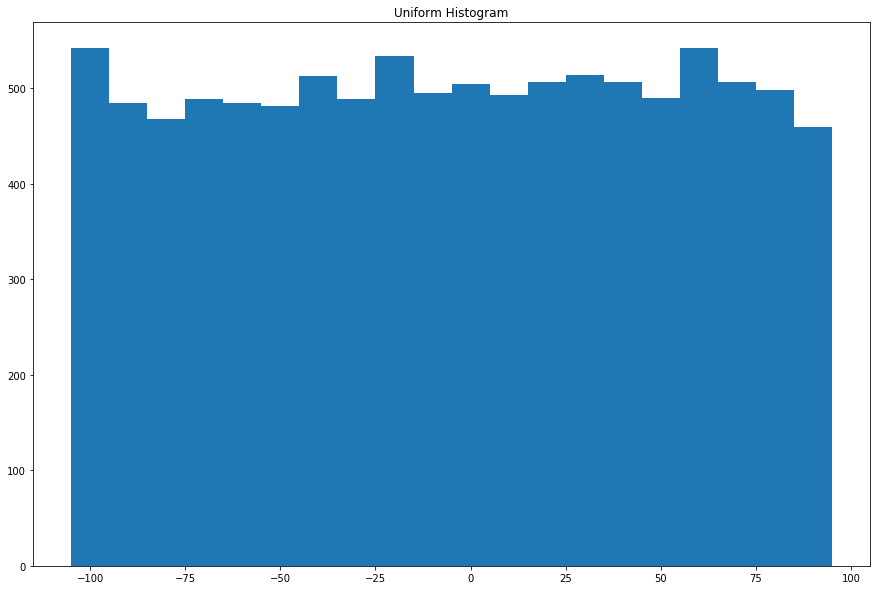

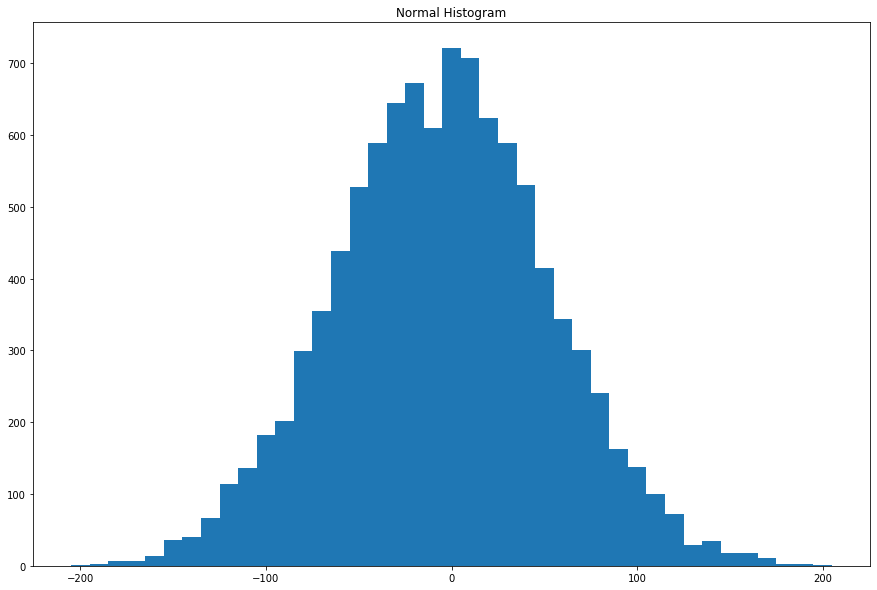

0.8971213958581609
-0.8917225701417892


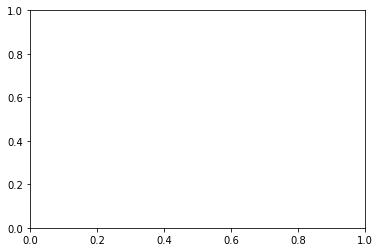

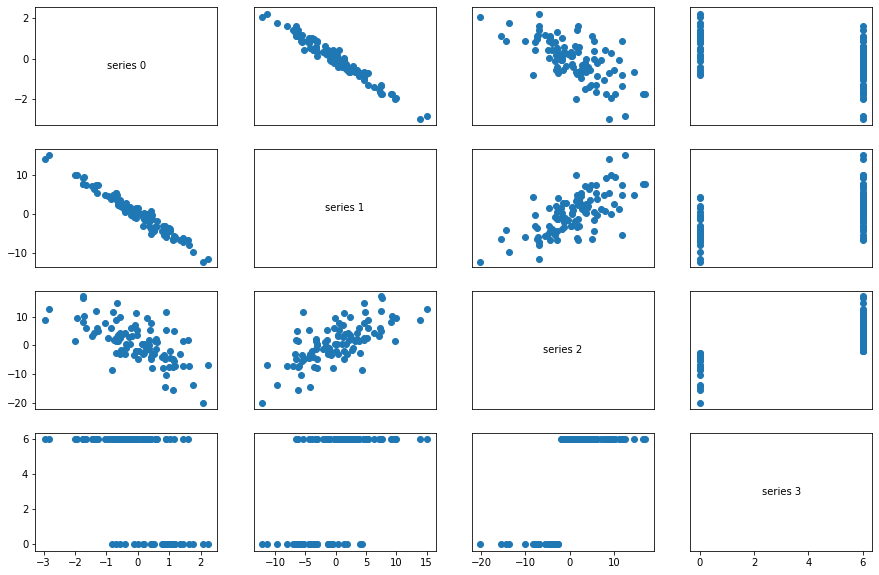

<Figure size 432x288 with 0 Axes>

skipping invalid row: ['MSFT', '6/19/2014', 'n/a']


  0%|          | 0/99997 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  0%|          | 0/100 [00:00<?, ?it/s]

First Principle Component: [0.9237307801943212, 0.3830423549969252]


<Figure size 432x288 with 0 Axes>

In [66]:
from scratch.linear_algebra import subtract

# Ignore this... it just cleans up something annoying...
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


def de_mean(data: List[Vector]) -> List[Vector]:
    """Recenters the data to have mean 0 in every dimension"""
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]

from scratch.linear_algebra import magnitude

def direction(w: Vector) -> Vector:
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

from scratch.linear_algebra import dot

def directional_variance(data: List[Vector], w: Vector) -> float:
    """
    Returns the variance of x in the direction of w
    """
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)

def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """
    The gradient of directional variance with respect to w
    """
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data)
            for i in range(len(w))]

from scratch.gradient_descent import gradient_step

def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    # Start with a random guess
    guess = [1.0 for _ in data[0]]

    with tqdm(range(n)) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:.3f}")

    return direction(guess)

from scratch.linear_algebra import scalar_multiply

def project(v: Vector, w: Vector) -> Vector:
    """return the projection of v onto the direction w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

from scratch.linear_algebra import subtract

def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    """projects v onto w and subtracts the result from v"""
    return subtract(v, project(v, w))

def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)

    return components

def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v, w) for w in components]

def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]

 # I don't know why this is necessary
plt.gca().clear()
plt.close()

import random
from scratch.probability import inverse_normal_cdf

random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
            for _ in range(10000)]

plot_histogram(uniform, 10, "Uniform Histogram")
plt.gcf().set_size_inches(15,10)
plt.savefig('working_histogram_uniform.png')
plt.show()
plt.gca().clear()
plt.close()

plot_histogram(normal, 10, "Normal Histogram")
plt.gcf().set_size_inches(15,10)
plt.show()
plt.savefig('working_histogram_normal.png')
plt.gca().clear()

from scratch.statistics import correlation

print(correlation(xs, ys1))      # about 0.9
print(correlation(xs, ys2))      # about -0.9



from typing import List

# Just some random data to show off correlation scatterplots
num_points = 100

def random_row() -> List[float]:
    row = [0.0, 0, 0, 0]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row

random.seed(0)
# each row has 4 points, but really we want the columns
corr_rows = [random_row() for _ in range(num_points)]

corr_data = [list(col) for col in zip(*corr_rows)]

# corr_data is a list of four 100-d vectors
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):
        # Scatter column_j on the x-axis vs column_i on the y-axis,
        if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])

        # unless i == j, in which case show the series name.
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                    xycoords='axes fraction',
                                    ha="center", va="center")

        # Then hide axis labels except left and bottom charts
        if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)

# Fix the bottom right and top left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.gcf().set_size_inches(15,10)
plt.show()



plt.savefig('working_scatterplot_matrix.png')
plt.show()
plt.gca().clear()
plt.close()
plt.clf()

import csv

data: List[StockPrice] = []

with open("data/comma_delimited_stock_prices.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        maybe_stock = try_parse_row(row)
        if maybe_stock is None:
            print(f"skipping invalid row: {row}")
        else:
            data.append(maybe_stock)

from typing import List

def primes_up_to(n: int) -> List[int]:
    primes = [2]

    with tqdm(range(3, n)) as t:
        for i in t:
            # i is prime if no smaller prime divides it.
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)

            t.set_description(f"{len(primes)} primes")

    return primes

my_primes = primes_up_to(100_000)

de_meaned = de_mean(pca_data)
fpc = first_principal_component(de_meaned)
assert 0.923 < fpc[0] < 0.925
assert 0.382 < fpc[1] < 0.384

print("First Principle Component: %s" % fpc)